Activity1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_curve



In [3]:
df = pd.read_csv('G:\\5th semester\\Machine Learning\\lab2\\DataSet\\Telco Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df[['tenure', 'MonthlyCharges', 'Contract', 'InternetService' ,'Churn']]
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['Churn'] = le.fit_transform(df['Churn'])

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.8041163946061036
F1 Score: 0.591715976331361


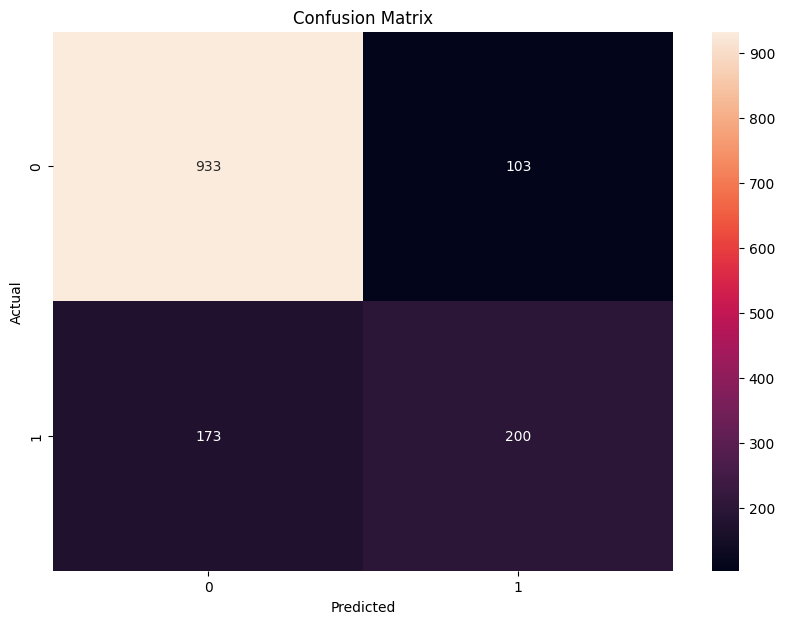

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Activity 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv('G:\\5th semester\\Machine Learning\\lab2\\DataSet\\Car Price Prediction.csv')

df.head()
df = pd.get_dummies(df, columns=['carbody', 'fueltype'], drop_first=True)
df.columns


Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'fueltype_gas'],
      dtype='object')

In [11]:
X = df[['carbody_hardtop','carbody_hatchback','carbody_sedan','carbody_wagon','fueltype_gas','enginesize','horsepower','curbweight']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Mean Squared Error: 15763213.877666615
R^2 Score: 0.8003241575230116


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


In [16]:
for degree in [2, 3]:
    poly_model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                               LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_test)
    
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    print(f"Polynomial Regression (degree={degree})")
    print("Mean Squared Error:", mse_poly)
    print("R^2 Score:", r2_poly)
    print()

Polynomial Regression (degree=2)
Mean Squared Error: 33462064.490497485
R^2 Score: 0.57612921007017

Polynomial Regression (degree=3)
Mean Squared Error: 214375158.4792099
R^2 Score: -1.715533818653645



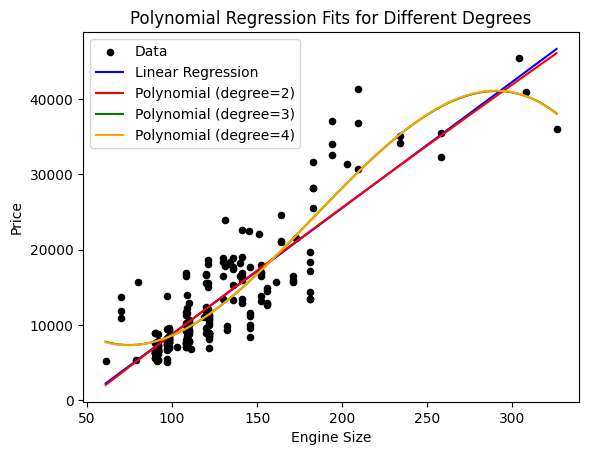

In [7]:
# Use only one feature for visualization
X = df[['enginesize']].values
y = df['price'].values

# Scatter plot of the original data
plt.scatter(X, y, color='black', s=20, label="Data")

# Create a grid of values for smooth curve plotting
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin = lin_reg.predict(X_plot)
plt.plot(X_plot, y_lin, label="Linear Regression", color="blue")

# Polynomial Regression for degree 2, 3, 4
colors = ["red", "green", "orange"]
for i, degree in enumerate([2, 3, 4]):
    poly_model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                               LinearRegression())
    poly_model.fit(X, y)
    y_poly = poly_model.predict(X_plot)
    plt.plot(X_plot, y_poly, label=f"Polynomial (degree={degree})", color=colors[i])

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Polynomial Regression Fits for Different Degrees")
plt.legend()
plt.show()